In [1]:
import intake
import pandas as pd

df = intake.open_csv('./data/bird_migration/{species}.csv').read()

def fill_day(v):
    next_year = v.assign(day=v.day + v.day.max())
    last_year = v.assign(day=v.day - v.day.max())
    surrounding_years = pd.concat([last_year, v, next_year])
    filled = surrounding_years.assign(
        lat=surrounding_years.lat.interpolate(), 
        lon=surrounding_years.lon.interpolate())
    this_year = filled[filled.day.isin(v.day)]
    return this_year

df = pd.concat([fill_day(v) for k, v in df.groupby('species')])

## Holoviews

All of the plots that we made with `hvplot` in the last notebook are actually `holoviews` objects rendered in bokeh. `holoviews` is centered around the idea of annotating your data and letting it display itself. Here we will quickly go through some of the same workflows as we did in the last notebook, but using pure `holoviews`

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
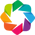

In [2]:
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

### Data structures

`holoviews` has it's own concept of a dataset which can accept lots of different types of array-like data such as `numpy.array`, `pandas.Dataframe`, `xarray.Dataset`. To create a `holoviews.Dataset` we'll define which of the columns in our dataframe are the *key dimensions* and which are the *value dimensions*.

In [3]:
bird_ds = hv.Dataset(df, kdims=['lon', 'lat'], vdims=['day', 'species'])
bird_ds

:Dataset   [lon,lat]   (day,species)

In [4]:
bird_ds.data.head()

day        lon        lat               species
0    1 -59.059606 -30.904415  Small-billed_Elaenia
1    2 -59.078229 -30.918065  Small-billed_Elaenia
2    3 -59.097509 -30.931192  Small-billed_Elaenia
3    4 -59.117439 -30.943741  Small-billed_Elaenia
4    5 -59.138009 -30.955660  Small-billed_Elaenia

So we've essentially wrapped some metadata around our data.

### Visualizing data

Since we annotated our data with which dimensions are keys and which are value dimensions, we don't have to specify that later in the call to plot the data. 

In [5]:
p = bird_ds.to(hv.Points).opts(opts.Points(height=500, width=700))
p

:Points   [lon,lat]   (day,species)

In [6]:
print(p)

:Points   [lon,lat]   (day,species)


We can look at the bird density across the timespan by instead making a hextiles plot.

In [7]:
hv.HexTiles(bird_ds).opts(opts.HexTiles(height=500, width=700))

:HexTiles   [lon,lat]   (day,species)

### Styling

We can use a special colormap from `colorcet` to get the maximum visual distance between each species. Here I am using [Glasbey colors](https://github.com/taketwo/glasbey) and creating a colormap where each bird is mapped to a specific color.

In [8]:
import colorcet as cc

species_cmap = dict(zip(df.species.cat.categories, cc.glasbey))

In [9]:
p.opts(opts.Points(color_index='species', height=500, width=800, legend_position='right', cmap=species_cmap))

:Points   [lon,lat]   (day,species)

Notice that `p` itself was not altered, just the way that `p` was rendered in that one cell.

### Grouping

Just as we did in `hvplot` we can group these plots and add widgets to enhance the dimensionality of out visualization.

In [10]:
grouped_birds = p.groupby('day')
grouped_birds.opts(opts.Points(color_index='species', height=500, width=700,
                               show_legend=False, tools=['hover', 'tap', 'box_select'],
                               cmap=species_cmap, size=5))

:HoloMap   [day]
   :Points   [lon,lat]   (day,species)

In [11]:
print(grouped_birds)

:HoloMap   [day]
   :Points   [lon,lat]   (day,species)


### Adding another layer of data

It is often useful to add another layer of information under a dataset. In this case we might suspect that birds are motivated to migrate because of changing temperature. We will explore that hypothesis by importing data from a global climate model. For this we will use `xarray`.

In [12]:
import os
import xarray as xr
import hvplot.xarray

In [13]:
data_url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep/air.day.ltm.nc'

# I downloaded the file locally because I was hitting rate limits.
local_file = './data/air.day.ltm.nc'
if os.path.isfile(local_file):
    data_url = local_file
    
ds = xr.open_dataset(data_url)

/Users/jsignell/conda/envs/birds/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/Users/jsignell/conda/envs/birds/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


The time is in a strange format because it is day of year means for each grid cell. We can convert those to integer day of year like we have for our bird data.

In [14]:
ds = ds.rename(time='day')
ds['day'] = list(range(1,366))
ds.day

<xarray.DataArray 'day' (day: 365)>
array([  1,   2,   3, ..., 363, 364, 365])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365

We'll use `hvplot` to quickly take a look at this new data.

In [15]:
ds['air'].hvplot(x='lon', y='lat', groupby=['level', 'day'], height=500)

:DynamicMap   [level,day]
   :Image   [lon,lat]   (air)

Since we are interested in the temperature near the surface of the earth, we only really need the 1000mbar level. We can select that directly from the `xarray.dataset`.

In [16]:
grouped_air = ds.sel(level=1000).hvplot('lon', 'lat', groupby='day')
grouped_air

:DynamicMap   [day]
   :Image   [lon,lat]   (air)

In [17]:
print(grouped_air)

:DynamicMap   [day]
   :Image   [lon,lat]   (air)


**NOTE:** `hvplot` defaults to dynamic mapping rather than pre-computed mapping. This makes it much quicker to render, but means that all the plots aren't computed ahead of time, so there is a bit of a lag sometimes.

We can explore how this works by dragging the `day` slider and checking the keys that we have on our plot:

In [18]:
grouped_air.keys()

[1]

Since the bird plot and the air plot are both holoviews object on the same axes, we can combine them into one plot. Remember that the air temperature plot was made using `hvplot` and the bird plot was made using `holoviews` - but since the outputs are all holoviews objects this history doesn't matter.

In [19]:
(grouped_air * grouped_birds).opts(height=400)

:DynamicMap   [day]
   :Overlay
      .Image.I  :Image   [lon,lat]   (air)
      .Points.I :Points   [lon,lat]   (day,species)

Hmmm. That doesn't look great. Turns out that the birds and the temperature use different conventions for longitude. This is a great time to realize that *all* of these data really belong in a geographic context.

[Next Section](./03_geoviews.ipynb#Geoviews)